In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import glob
from skimage.transform import downscale_local_mean

In [2]:
path_to_dataset = "/home/melanie/Desktop/Reconstructing_Space_with_Time/DATASETS_DEPTH_IMAGE_ECHO_RECORDINGS/Dataset_Day1"


depthMaps=sorted(glob.glob(f"{path_to_dataset}/SOUND_ECHO_and_DEPTH/DEPTH_MAPS/FILTERED_DEPTH_MAPS/*.png"))
audios=sorted(glob.glob(f"{path_to_dataset}/SOUND_ECHO_and_DEPTH/SOUND_RECORDINGS/NPY/*.npy"))

# lets see whcih is the maximum sound sample number to pad all the rest to this size
max_size=0
for audio_path in audios:
    audio = np.load(audio_path)
    max_size=max(max_size, len(audio))

print(f"Maximum number of samples is {max_size}")

Maximum number of samples is 2054


In [3]:
reduce_audio_length_by = 2
reduce_h_w_image_by = 8

In [4]:
h5f = h5py.File(f"{path_to_dataset}/Dataset.h5", 'a') # append if exists, create if not

for idx, (audio_path, image_path) in enumerate(zip(audios, depthMaps)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    audio = np.load(audio_path)
    # first pad audio to maximum size
    audio = np.pad( audio, (0, max_size-len(audio)))
    if reduce_audio_length_by !=1:
        audio = downscale_local_mean( audio, (reduce_audio_length_by,))
    if reduce_h_w_image_by!=1:
        image = downscale_local_mean( image, (reduce_h_w_image_by, reduce_h_w_image_by))
    
    h5f.create_dataset(f"{idx}_aud", data=audio, compression="lzf", shuffle=True) 
    h5f.create_dataset(f"{idx}_im", data=image, compression="lzf", shuffle=True) 
    if idx%100==0:
        print(idx)

h5f.flush()
h5f.close()

0
100
200
300
400
500
600
700
800
900
1000


In [5]:
h5f = h5py.File(f"{path_to_dataset}/Dataset.h5", 'r')

In [6]:
len(h5f)/2

1023.0

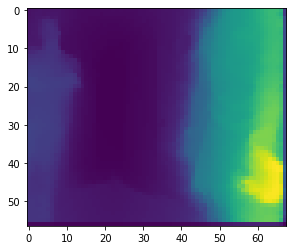

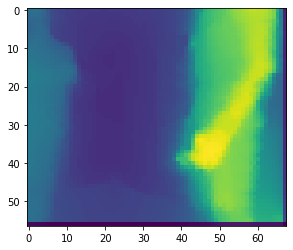

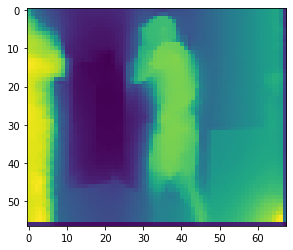

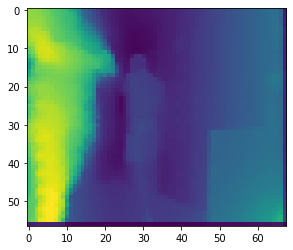

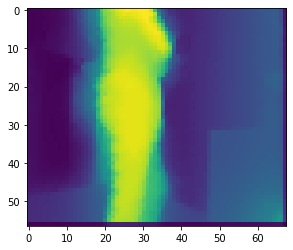

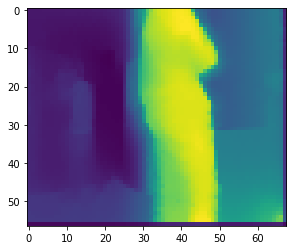

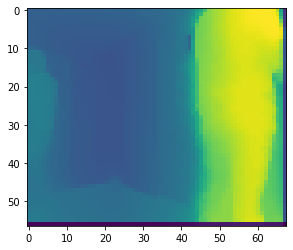

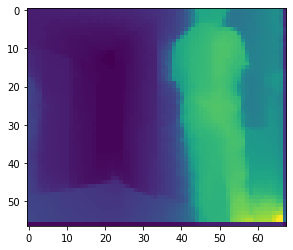

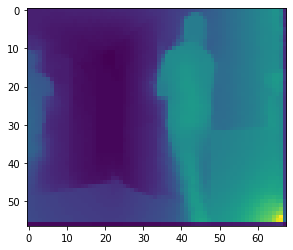

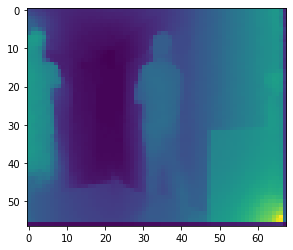

In [7]:
for i in range(10):
    plt.imshow(h5f[f"{i}_im"])
    plt.show()

In [8]:
h5f.close()

In [10]:
h5f = h5py.File(f"{path_to_dataset}/Dataset.h5", 'r')

In [11]:
for i in range(10):
    print(h5f[f"{i}_im"].shape)

(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)


In [8]:
h5f.close()